                                           VERƒ∞ HAZIRLAMA/D√úZENLEME/TEMƒ∞ZLEME

In [36]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import ast

raw = pd.read_csv("raw_titles.csv")

In [37]:
raw.head()

index        id                                title   type  release_year  \
0      0  ts300399  Five Came Back: The Reference Films   SHOW          1945   
1      1   tm84618                          Taxi Driver  MOVIE          1976   
2      2  tm127384      Monty Python and the Holy Grail  MOVIE          1975   
3      3   tm70993                        Life of Brian  MOVIE          1979   
4      4  tm190788                         The Exorcist  MOVIE          1973   

  age_certification  runtime                 genres production_countries  \
0             TV-MA       48      ['documentation']               ['US']   
1                 R      113     ['crime', 'drama']               ['US']   
2                PG       91  ['comedy', 'fantasy']               ['GB']   
3                 R       94             ['comedy']               ['GB']   
4                 R      133             ['horror']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  
0      1.0        NaN         NaN         NaN  
1      NaN  tt0075314         8.3    795222.0  
2      NaN  tt0071853         8.2    530877.0  
3      NaN  tt0079470         8.0    392419.0  
4      NaN  tt0070047         8.1    391942.0

In [38]:
# Veri setinin genel durumu
raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5806 non-null   int64  
 1   id                    5806 non-null   object 
 2   title                 5805 non-null   object 
 3   type                  5806 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 589.8+ KB


In [39]:
# Eksik deƒüerlerin kontrol√º
bos_degerler = raw.isnull().sum()
print(bos_degerler)

# Eksik verilerin y√ºzdesini hesaplama
bos_deger_orani = (bos_degerler / len(raw)) * 100
print(bos_deger_orani)

index                      0
id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64
index                    0.000000
id                       0.000000
title                    0.017224
type                     0.000000
release_year             0.000000
age_certification       44.953496
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.743369
imdb_id                  7.647261
imdb_score               9.007923
imdb_votes               9.283500
dtype: float64


Burada hangi s√ºtunda ka√ß adet null deƒüeri var ve oranƒ±nƒ± g√∂steriyor.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# imdb_votes s√ºtunundaki eksik olmayan ve eksik olan satƒ±rlarƒ± ayƒ±rma
train_data = raw[raw['imdb_votes'].notnull()]
test_data = raw[raw['imdb_votes'].isnull()]

# √ñzellikleri (X) ve hedefi (y) belirleme
features = ['runtime', 'imdb_score']
X_train = train_data[features]
y_train = train_data['imdb_votes']
X_test = test_data[features]

# Eksik verilerin yerine bir tahmin modeli eƒüitme
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Eksik imdb_votes deƒüerlerini tahmin etme
predicted_votes = model.predict(X_test)

# Tahmin edilen deƒüerlerle sadece imdb_votes s√ºtunundaki eksik h√ºcreleri doldurma
raw.loc[raw['imdb_votes'].isnull(), 'imdb_votes'] = predicted_votes



In [41]:
from sklearn.ensemble import RandomForestRegressor

# imdb_score s√ºtunundaki eksik olmayan ve eksik olan satƒ±rlarƒ± ayƒ±rma
train_data = raw[raw['imdb_score'].notnull()]
test_data = raw[raw['imdb_score'].isnull()]

# √ñzellikleri (X) ve hedefi (y) belirleme
features = ['runtime', 'imdb_votes']
X_train = train_data[features]
y_train = train_data['imdb_score']
X_test = test_data[features]

# Model olu≈üturma
model = RandomForestRegressor(random_state=42)

# Model eƒüitimi
model.fit(X_train, y_train)

# Eksik imdb_score deƒüerlerini tahmin etme
predicted_scores = model.predict(X_test)

# Tahmin edilen deƒüerlerle yalnƒ±zca imdb_score s√ºtunundaki eksik h√ºcreleri doldurma
raw.loc[raw['imdb_score'].isnull(), 'imdb_score'] = predicted_scores


yukarƒ±da makine √∂ƒürenmesi tekniƒüiyle imdb_score ve imdb_votes s√ºtunundaki NaN deƒüerlerini doldurdum.

age_certification, seasons, imdb_id s√ºtunlarƒ± analizimiz i√ßin √∂nemli olmayacaƒüƒ±/bir katkƒ± saƒülamayacaƒüƒ± i√ßin 
bu s√ºtunlarƒ± a≈üaƒüƒ±daki kod bloƒüu ile kaldƒ±racaƒüƒ±m

In [42]:
raw = raw.drop(columns=['age_certification', 'seasons', 'imdb_id'])

gereksiz ve NaN i√ßeren s√ºtunlarƒ± kaldƒ±rdƒ±m

In [43]:
raw=raw[raw['title'].notna()] 


title s√ºtunundaki 1 veriyi kaldƒ±rdƒ±m

In [44]:
# raw.info()
raw.isnull().sum()

index                   0
id                      0
title                   0
type                    0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
dtype: int64

In [45]:
empty_rows_count = raw.apply(lambda row: any(cell == '[]' for cell in row), axis=1).sum()
empty_rows_count

np.int64(272)

verisetimizde nan olarak g√∂r√ºnmeyen ama i√ßeriƒüi bo≈ü olan [] ≈üeklinde liteler bulunuyor yukarƒ±daki kod bloƒüu ka√ß adet [] bo≈ü liste olduƒüunu g√∂steriyor.

In [46]:
# genre ve production_countries s√ºtunlarƒ±ndaki bo≈ü listeleri kontrol edip, bu satƒ±rlarƒ± kaldƒ±rƒ±yoruz
raw = raw[~raw['genres'].apply(lambda x: x == '[]')]
raw = raw[~raw['production_countries'].apply(lambda x: x == '[]')]



[] ≈üeklinde bo≈ü listeleri i√ßere satrlarƒ± kaldƒ±rdƒ±m

In [47]:
empty_rows_count = raw.apply(lambda row: any(cell == '[]' for cell in row), axis=1).sum()
empty_rows_count

np.int64(0)

G√∂r√ºld√ºƒü√º gibi [] bo≈ü listler kaldƒ±rƒ±ldƒ±.

NaN deƒüerlerini ve [] bo≈ü listeleri temizledik artƒ±k analizlerimize ba≈ülayabiliriz

In [48]:
# Genel istatistikler
print("Toplam Kayƒ±t:", len(raw))
print("Film Sayƒ±sƒ±:", len(raw[raw['type'] == 'MOVIE']))
print("Dizi Sayƒ±sƒ±:", len(raw[raw['type'] == 'SHOW']))
print("Ortalama IMDb Puanƒ±:", raw['imdb_score'].mean())
print("En Yaygƒ±n T√ºr:", raw['genres'].explode().mode()[0])
print("En Yaygƒ±n √úlke:", raw['production_countries'].explode().mode()[0])


Toplam Kayƒ±t: 5533
Film Sayƒ±sƒ±: 3588
Dizi Sayƒ±sƒ±: 1945
Ortalama IMDb Puanƒ±: 6.543050442797759
En Yaygƒ±n T√ºr: ['comedy']
En Yaygƒ±n √úlke: ['US']


A≈üaƒüƒ±daki analizlerimde drama t√ºr√ºn√ºn pop√ºler olduƒüu fakat yukarƒ±daki analizde en yaygƒ±n t√ºr comedy oldƒüu g√∂r√ºl√ºyor.
Bunun sebei t√ºr s√ºtununda veriler ['comedy','drama'] gibi tutuluyor ve bu satƒ±rlarƒ± sayƒ±yor bu y√ºzden yanƒ±ltƒ±cƒ± olabiliyor.
Bunu daha tutarlƒ± hale getirmek i√ßin genres s√ºtunun her h√ºcresindeki listenin ilk deƒüerini aldƒ±m. Yani Yukarƒ±daki liste √∂rneƒüinde Comedy asƒ±l t√ºr olarak alƒ±nƒ±yor. 
√ñrneƒüin, ['drama','thriller','scifi'] bu listede ise Drama asƒ±l t√ºr olarak alƒ±nƒ±yor.

                                    üìöüìö G√ñRSELLE≈ûTƒ∞RMELER VE ANALƒ∞Z KISIMLARI üìöüìö

                                            üïõüïõPuan ile S√ºre ƒ∞li≈ükisiüïõüïõ

In [49]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5533 entries, 0 to 5803
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5533 non-null   int64  
 1   id                    5533 non-null   object 
 2   title                 5533 non-null   object 
 3   type                  5533 non-null   object 
 4   release_year          5533 non-null   int64  
 5   runtime               5533 non-null   int64  
 6   genres                5533 non-null   object 
 7   production_countries  5533 non-null   object 
 8   imdb_score            5533 non-null   float64
 9   imdb_votes            5533 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 475.5+ KB


In [50]:
max_puan=raw['imdb_score'].max()
max_puanli_film=raw[raw['imdb_score']==max_puan]
max_puanli_film

index   id         title  type  release_year  runtime  \
243    243  ts4  Breaking Bad  SHOW          2008       48   

                             genres production_countries  imdb_score  \
243  ['drama', 'thriller', 'crime']               ['US']         9.5   

     imdb_votes  
243   1727694.0

En y√ºksek puanlƒ± dizi 9.5 ile Braking Bad olmu≈ü.

In [51]:
min_puan=raw['imdb_score'].min()
min_puanli_film=raw[raw['imdb_score']==min_puan]
min_puanli_film

index        id    title   type  release_year  runtime  \
1757   1757  tm549892  Aerials  MOVIE          2016       90   

                              genres production_countries  imdb_score  \
1757  ['drama', 'scifi', 'thriller']               ['AE']         1.5   

      imdb_votes  
1757       382.0

En d√º≈ü√ºk puanlƒ± film 1.5 puanla Aerials olmu≈ü.

In [52]:
# Puan ve oy sayƒ±sƒ±na dayalƒ± puanlama
raw['normalized_score'] = raw['imdb_score'] * raw['imdb_votes']

# oy sayƒ±sƒ±na g√∂re En y√ºksek ve en d√º≈ü√ºk puanƒ± bulma
max_oy_skor = raw['normalized_score'].max()
min_oy_skor = raw['normalized_score'].min()

# Bu deƒüerlere sahip filmleri bulma
max_oylu_film = raw[raw['normalized_score'] == max_oy_skor]
min_oylu_film = raw[raw['normalized_score'] == min_oy_skor]

# Sonu√ßlar
print("kullanƒ±lan oya g√∂re en y√ºksek puanlƒ± film/dizi:")
print(max_oylu_film[['title', 'imdb_score', 'imdb_votes', 'normalized_score']])

print("\nkullanƒ±lan oya g√∂re en d√º≈ü√ºk puanlƒ± film/dizi:")
print(min_oylu_film[['title', 'imdb_score', 'imdb_votes', 'normalized_score']])

kullanƒ±lan oya g√∂re en y√ºksek puanlƒ± film/dizi:
         title  imdb_score  imdb_votes  normalized_score
260  Inception         8.8   2268288.0        19960934.4

kullanƒ±lan oya g√∂re en d√º≈ü√ºk puanlƒ± film/dizi:
        title  imdb_score  imdb_votes  normalized_score
98  High Risk         3.8         6.0              22.8


≈üimdi de s√ºre ve oy arasƒ±ndaki ili≈ükileri inceleyeceƒüiz.

In [53]:
raw['imdb_score'].describe()

count    5533.000000
mean        6.543050
std         1.118805
min         1.500000
25%         5.900000
50%         6.627000
75%         7.300000
max         9.500000
Name: imdb_score, dtype: float64

ortalama puan 6.54
en y√ºksek puan 9.5
en d√º≈ü√ºk puan 1.5
ve standart sapmasƒ± 1.11

In [54]:
raw['runtime'].describe()

count    5533.000000
mean       78.745165
std        39.468117
min         0.000000
25%        45.000000
50%        86.000000
75%       105.000000
max       251.000000
Name: runtime, dtype: float64

minimum 0 dakika olan i√ßerik varmƒ±≈ü ?? hesaplamalarƒ±mƒ±zda 0 olan satƒ±rlarƒ± i≈üleme dahil etmeyeceƒüim
maksimum 251 dakika olan i√ßerik varmƒ±≈ü
i√ßeriklerin ortalama s√ºresi ise 79 dakikaymƒ±≈ü

In [55]:
dakika=raw[raw['runtime']==251]
dakika

index        id                   title   type  release_year  runtime  \
34     34  tm188894  The School of Mischief  MOVIE          1973      251   

        genres production_countries  imdb_score  imdb_votes  normalized_score  
34  ['comedy']               ['EG']       6.739    20112.33      135536.99187

In [56]:
dakika=raw[raw['runtime']==0]
dakika

index        id                                      title  type  \
472     472   ts74931              Kung Fu Panda Awesome Secrets  SHOW   
478     478   ts98252  Dreamworks Happy Holidays from Madagascar  SHOW   
561     561   ts67595                          Pedro El Escamoso  SHOW   
896     896   ts99814                                   Masameer  SHOW   
2618   2618   ts74765                       Daughters of Destiny  SHOW   
3165   3165  ts250172                                   Afronta!  SHOW   
3752   3752  ts268592                        Beyblade Burst Rise  SHOW   
3981   3981  ts217719                      Basketball or Nothing  SHOW   
3993   3993  ts255418                Bad Boy Billionaires: India  SHOW   
4008   4008  ts237071               The Forest of Love: Deep Cut  SHOW   
4496   4496   ts88146   Larry Charles' Dangerous World of Comedy  SHOW   
4776   4776  ts222838            I'm with the Band: Nasty Cherry  SHOW   
4919   4919  ts327074                     Bullsh*t the Game Show  SHOW   
5213   5213  ts346007                              Savage Beauty  SHOW   
5218   5218  ts315144                         The Creature Cases  SHOW   
5421   5421  ts243780                                   Sharkdog  SHOW   
5579   5579  ts257873                                  Dive Club  SHOW   
5612   5612  ts305732                         Metal Shop Masters  SHOW   
5712   5712  ts272422                     Buried by the Bernards  SHOW   

      release_year  runtime  \
472           2008        0   
478           2005        0   
561           2001        0   
896           2011        0   
2618          2017        0   
3165          2017        0   
3752          2019        0   
3981          2019        0   
3993          2020        0   
4008          2020        0   
4496          2019        0   
4776          2019        0   
4919          2022        0   
5213          2022        0   
5218          2022        0   
5421          2021        0   
5579          2021        0   
5612          2021        0   
5712          2021        0   

                                                 genres production_countries  \
472         ['action', 'comedy', 'family', 'animation']               ['US']   
478                   ['animation', 'comedy', 'family']               ['US']   
561                                 ['drama', 'comedy']               ['CO']   
896                             ['comedy', 'animation']               ['SA']   
2618                                  ['documentation']               ['IN']   
3165                                  ['documentation']               ['BR']   
3752  ['action', 'scifi', 'sport', 'thriller', 'anim...               ['XX']   
3981                         ['documentation', 'sport']               ['US']   
3993                         ['crime', 'documentation']               ['XX']   
4008           ['crime', 'horror', 'thriller', 'drama']               ['JP']   
4496                        ['documentation', 'comedy']               ['US']   
4776                                        ['reality']               ['US']   
4919                                        ['reality']               ['US']   
5213                                          ['drama']               ['US']   
5218        ['animation', 'family', 'action', 'comedy']               ['US']   
5421                  ['comedy', 'family', 'animation']         ['SG', 'US']   
5579                                ['drama', 'family']               ['AU']   
5612                                        ['reality']               ['US']   
5712                                        ['reality']               ['US']   

      imdb_score   imdb_votes  normalized_score  
472        7.200    55.000000        396.000000  
478        6.500    96.000000        624.000000  
561        7.500   303.000000       2272.500000  
896        8.200   677.000000       5551.400000  
2618       8.600   900.000000       7740.000000  
316

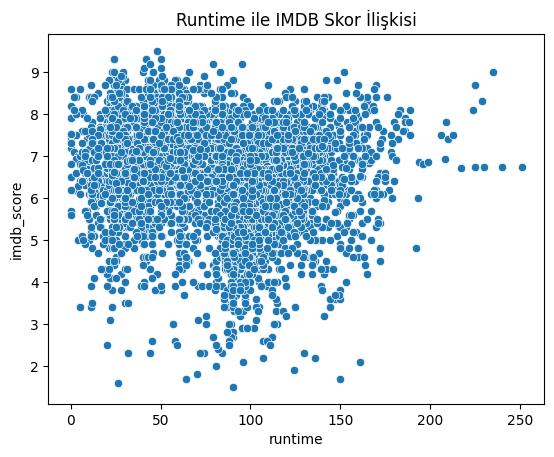

In [57]:
# imdb_score ve runtime arasƒ±ndaki ili≈üki
sns.scatterplot(x='runtime', y='imdb_score', data=raw)
plt.title("Runtime ile IMDB Skor ƒ∞li≈ükisi")
plt.show()

1. Yoƒüunluk: 

   Veri noktalarƒ±nƒ±n b√ºy√ºk bir kƒ±smƒ± 50 ile 150 dakika arasƒ±ndaki runtime deƒüerlerinde yoƒüunla≈ümƒ±≈ütƒ±r. Bu, √ßoƒüu filmin/dizinin bu s√ºre  aralƒ±ƒüƒ±nda olduƒüu anlamƒ±na gelir.

2. Artan S√ºre ile D√º≈üen Puanlar:

   Grafikte, runtime s√ºresi arttƒ±k√ßa IMDb puanlarƒ±nƒ±n genel olarak d√º≈üt√ºƒü√º g√∂zlemlenmektedir. √ñzellikle 150 dakikanƒ±n √ºzerindeki runtime deƒüerlerinde, y√ºksek puanlƒ± yapƒ±mlarƒ±n sayƒ±sƒ± azalmaktadƒ±r. Bu durum, uzun s√ºren film/dizilerin izleyiciler tarafƒ±ndan daha az beƒüenildiƒüi ≈üeklinde yorumlanabilir. Ancak bu, t√ºm uzun yapƒ±mlarƒ±n k√∂t√º olduƒüu anlamƒ±na gelmez.

3. Kƒ±sa S√ºre ve Y√ºksek Puanlar:

   Kƒ±sa runtime'a sahip (√∂zellikle 50 dakikanƒ±n altƒ±) bazƒ± yapƒ±mlarƒ±n y√ºksek IMDb puanlarƒ±na sahip olduƒüu g√∂r√ºlmektedir. Bu durum, kƒ±sa ve √∂z anlatƒ±mlarƒ±n izleyiciler tarafƒ±ndan takdir edildiƒüini g√∂sterebilir. Ancak aynƒ± zamanda, √ßok d√º≈ü√ºk puanlƒ± kƒ±sa yapƒ±mlar da bulunmaktadƒ±r, bu da s√ºrenin tek ba≈üƒ±na kaliteyi belirlemediƒüini g√∂sterir.

4. Genel Daƒüƒ±lƒ±m:

   Grafikteki veri noktalarƒ± olduk√ßa daƒüƒ±nƒ±k bir ≈üekilde yayƒ±lmƒ±≈ütƒ±r. Bu, runtime ve IMDb puanƒ± arasƒ±nda g√º√ßl√º bir doƒürusal ili≈üki olmadƒ±ƒüƒ±nƒ± g√∂sterir. Ba≈üka bir deyi≈üle, bir filmin/dizinin s√ºresi tek ba≈üƒ±na IMDb puanƒ±nƒ± belirleyen bir fakt√∂r deƒüildir. Kalite, senaryo, oyunculuk gibi bir√ßok farklƒ± fakt√∂r de puanƒ± etkilemektedir.

√ñzetle:
Grafik, film/dizi s√ºresi ile IMDb puanƒ± arasƒ±nda net bir doƒürusal ili≈üki olmadƒ±ƒüƒ±nƒ± g√∂stermektedir. Ancak, √ßok uzun yapƒ±mlarƒ±n genel olarak daha d√º≈ü√ºk puanlara sahip olduƒüu ve kƒ±sa ve √∂z yapƒ±mlarƒ±n da y√ºksek puan alabileceƒüi g√∂zlemlenmektedir. S√ºrenin tek ba≈üƒ±na kaliteyi belirlemediƒüi, diƒüer fakt√∂rlerin de √∂nemli olduƒüu unutulmamalƒ±dƒ±r.

In [58]:
# S√ºresi 0 olan satƒ±rlarƒ± filtreleme
filtrelenmis_veri = raw[raw['runtime'] > 0].copy()

# S√ºreyi kƒ±sa ve uzun olarak sƒ±nƒ±flandƒ±rma
filtrelenmis_veri.loc[:, 'Kategori'] = filtrelenmis_veri['runtime'].apply(lambda x: 'Kƒ±sa' if x <= 78.7 else 'Uzun')

# Kƒ±sa ve uzun kategorilerin sayƒ±sƒ±
print(filtrelenmis_veri['Kategori'].value_counts())


Kategori
Uzun    3014
Kƒ±sa    2500
Name: count, dtype: int64


Burada e≈üik deƒüerimizi i√ßeriklerin ortalama dakikasƒ± olan 78.7 dakika belirledik ve kategori s√ºtunu olu≈üturup kƒ±sa ve uzun olarak sƒ±nƒ±flandƒ±rdƒ±k.
g√∂r√ºld√ºƒü√º gibi 3014 adet uzun i√ßerik,
2519 adet kƒ±sa i√ßerik bulunuyor.

Kategori
Kƒ±sa    6.884566
Uzun    6.255936
Name: imdb_score, dtype: float64


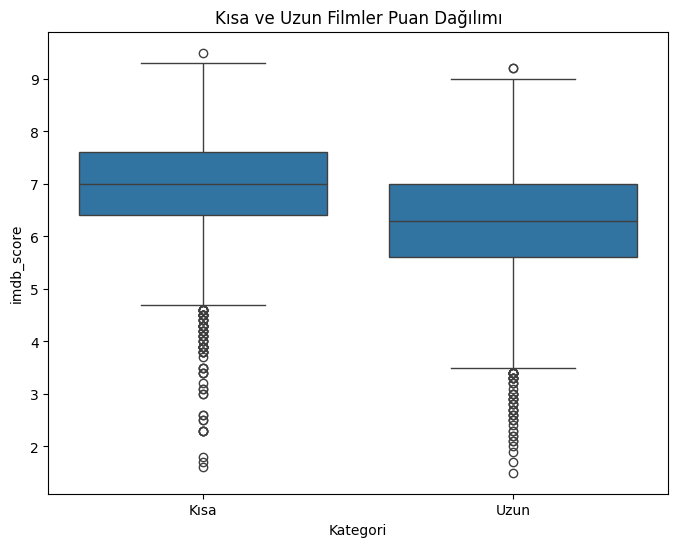

In [59]:
# Kƒ±sa ve uzun sƒ±nƒ±flar i√ßin puan ortalamalarƒ±
kategori_ortalama_puan = filtrelenmis_veri.groupby('Kategori')['imdb_score'].mean()
print(kategori_ortalama_puan)

# Grafik
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kategori', y='imdb_score', data=filtrelenmis_veri)
plt.title('Kƒ±sa ve Uzun Filmler Puan Daƒüƒ±lƒ±mƒ±')
plt.show()


kƒ±sa ve uzun film deƒüerini a≈üaƒüƒ±daki kod satƒ±rƒ± ile 78.7 den b√ºy√ºk olan yapƒ±mlar uzun, bu deƒüerden k√º√ß√ºk olan yapƒ±mlar kƒ±sa olarak deƒüerlendirlimi≈ütir.
***filtrelenmis_veri.loc[:, 'Kategori'] = filtrelenmis_veri['runtime'].apply(lambda x: 'Kƒ±sa' if x <= 78.7 else 'Uzun')***

1. Medyan (Orta Deƒüer):

   Kƒ±sa filmlerin medyan IMDb puanƒ±, uzun filmlerin medyan puanƒ±ndan biraz daha y√ºksektir. Bu, genel olarak kƒ±sa filmlerin ortalama olarak biraz daha y√ºksek puanlar aldƒ±ƒüƒ±nƒ± g√∂sterir. Grafikte kutularƒ±n i√ßindeki yatay √ßizgiler medyanƒ± g√∂sterir.

2. √áeyrekler Arasƒ± Aralƒ±k (IQR):

   IQR, kutunun y√ºksekliƒüi ile temsil edilir ve verilerin %50'sinin hangi aralƒ±kta olduƒüunu g√∂sterir. Kƒ±sa ve uzun filmlerin IQR deƒüerleri yakla≈üƒ±k olarak benzerdir. Bu, her iki film kategorisinde de puanlarƒ±n benzer bir aralƒ±kta daƒüƒ±ldƒ±ƒüƒ±nƒ± g√∂sterir.

3. Aykƒ±rƒ± Deƒüerler (Outliers):

   Grafikte, kutularƒ±n dƒ±≈üƒ±nda noktalar olarak g√∂sterilen √ßok sayƒ±da aykƒ±rƒ± deƒüer bulunmaktadƒ±r. Bu, hem kƒ±sa hem de uzun filmler arasƒ±nda √ßok y√ºksek veya √ßok d√º≈ü√ºk puanlara sahip filmlerin olduƒüunu g√∂sterir. √ñzellikle kƒ±sa filmler tarafƒ±nda, d√º≈ü√ºk puanlƒ± aykƒ±rƒ± deƒüerlerin daha fazla olduƒüu g√∂r√ºlmektedir. Bu, bazƒ± kƒ±sa filmlerin √ßok d√º≈ü√ºk puanlar aldƒ±ƒüƒ±nƒ± g√∂sterir.

4. Daƒüƒ±lƒ±m:

   Her iki kategoride de puan daƒüƒ±lƒ±mƒ± yakla≈üƒ±k olarak simetriktir. Ancak, kƒ±sa filmlerde d√º≈ü√ºk puanlƒ± aykƒ±rƒ± deƒüerlerin daha fazla olmasƒ±, daƒüƒ±lƒ±mƒ± biraz daha sola eƒüimli hale getirir.

√ñzetle:

Kƒ±sa filmlerin medyan puanƒ± uzun filmlerden biraz daha y√ºksektir.
Her iki kategoride de puan daƒüƒ±lƒ±mƒ± benzerdir ve √ßok sayƒ±da aykƒ±rƒ± deƒüer bulunmaktadƒ±r.
Kƒ±sa filmlerde d√º≈ü√ºk puanlƒ± aykƒ±rƒ± deƒüerlerin daha fazla olmasƒ± dikkat √ßekicidir.

In [60]:
# Kƒ±sa ve uzun filmler i√ßin toplam oy sayƒ±sƒ±
kategori_toplam_oy = filtrelenmis_veri.groupby('Kategori')['imdb_votes'].sum()
print(kategori_toplam_oy)

Kategori
Kƒ±sa    3.432239e+07
Uzun    9.249913e+07
Name: imdb_votes, dtype: float64


kƒ±sa i√ßeriklere toplam 34M ki≈üi oy vermi≈ü (<78dk)
uzun i√ßeriklere 89M ki≈üi oy vermi≈ü (>78dk)

Genel Yorum:

1. Puan ve S√ºre Arasƒ±ndaki ƒ∞li≈üki:

   Kƒ±sa filmler/diziler, genellikle daha y√ºksek ve tutarlƒ± puanlara sahipken, uzun filmler/diziler daha geni≈ü bir puan aralƒ±ƒüƒ±nda deƒüi≈ükenlik g√∂stermektedir.

2. Oy Sayƒ±sƒ± ve Pop√ºlerlik:

   Uzun i√ßeriklerin, kƒ±sa i√ßeriklere kƒ±yasla daha fazla oy aldƒ±ƒüƒ±nƒ± ve dolayƒ±sƒ±yla daha pop√ºler olduƒüunu g√∂r√ºyoruz. Bu, uzun filmlerin/dizilerin izleyiciler tarafƒ±ndan daha √ßok izlendiƒüini veya daha √ßok deƒüerlendirildiƒüini g√∂sterir.
   
3. Korelasyon: 

   Her iki kategori i√ßin de puan aralƒ±klarƒ±nƒ±n benzer olduƒüunu, ancak uzun i√ßeriklerin daha pop√ºler olmasƒ±na raƒümen medyan puanƒ±n √ßok b√ºy√ºk bir farkla √∂ne √ßƒ±kmadƒ±ƒüƒ±nƒ± g√∂r√ºyoruz. Bu durum, s√ºrenin izleyici ilgisi √ºzerinde etkili olduƒüunu ancak puanlarƒ±n deƒüerlendirilmesinde √ßok g√º√ßl√º bir etkiye sahip olmadƒ±ƒüƒ±nƒ± g√∂sterir.

S√ºre ile puan arasƒ±ndaki korelasyon:  -0.178029892608458
S√ºre ile oy arasƒ±ndaki korelasyon:  0.2583621499301905


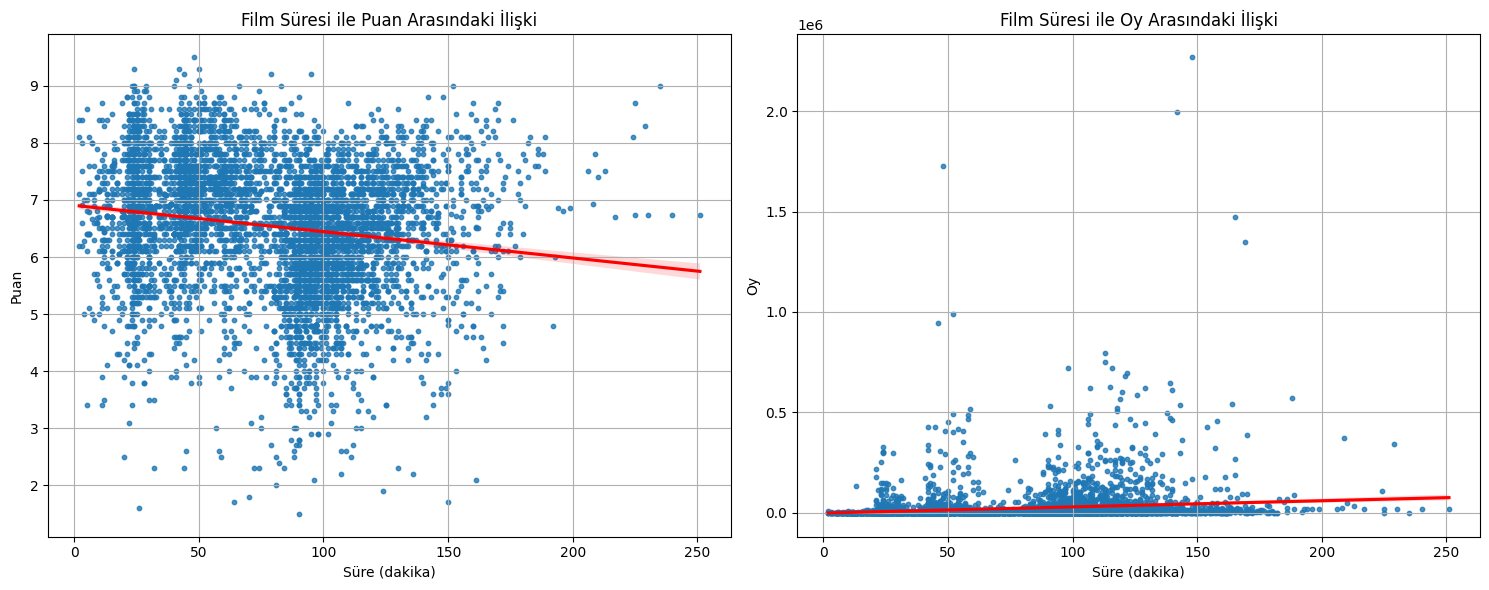

In [61]:
# Korelasyon ve p-deƒüeri hesaplama
korelasyon1, p_deger1 = spearmanr(filtrelenmis_veri['runtime'], filtrelenmis_veri['imdb_score'])
print("S√ºre ile puan arasƒ±ndaki korelasyon: ", korelasyon1)

korelasyon2, p_deger2 = spearmanr(filtrelenmis_veri['runtime'], filtrelenmis_veri['imdb_votes'])
print("S√ºre ile oy arasƒ±ndaki korelasyon: ", korelasyon2)

# Yan yana grafikler i√ßin subplot kullanma
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# √ºstteki scatter plot ve regresyon √ßizgisi
sns.regplot(data=filtrelenmis_veri, x='runtime', y='imdb_score', scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axs[0])
axs[0].set_title('Film S√ºresi ile Puan Arasƒ±ndaki ƒ∞li≈üki')
axs[0].set_xlabel('S√ºre (dakika)')
axs[0].set_ylabel('Puan')
axs[0].grid(True)

# alttaki scatter p. ve regresyon √ßizgisi
sns.regplot(data=filtrelenmis_veri, x='runtime', y='imdb_votes', scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axs[1])
axs[1].set_title('Film S√ºresi ile Oy Arasƒ±ndaki ƒ∞li≈üki')
axs[1].set_xlabel('S√ºre (dakika)')
axs[1].set_ylabel('Oy')
axs[1].grid(True)

plt.tight_layout()
plt.show()

S√ºre ve Puan Arasƒ±ndaki Korelasyon:
Korelasyon Katsayƒ±sƒ±: -0.178
Anlamƒ±: S√ºre ile puan arasƒ±nda hafif negatif bir korelasyon bulunmakta. Bu da film s√ºresi arttƒ±k√ßa puanlarƒ±n azalma eƒüiliminde olduƒüunu g√∂sterir. Ancak, bu ili≈üki zayƒ±ftƒ±r ve s√ºrenin puanlar √ºzerinde belirgin bir etkisi olmadƒ±ƒüƒ±nƒ± s√∂ylemek m√ºmk√ºnd√ºr.

S√ºre ve Oy Arasƒ±ndaki Korelasyon:
Korelasyon Katsayƒ±sƒ±: 0.258
Anlamƒ±: S√ºre ile oy sayƒ±sƒ± arasƒ±nda hafif pozitif bir korelasyon bulunmakta. Bu, film s√ºresi arttƒ±k√ßa oy sayƒ±sƒ±nƒ±n da arttƒ±ƒüƒ±nƒ± g√∂sterir. Bu da daha uzun filmlerin izleyiciler tarafƒ±ndan daha fazla deƒüerlendirildiƒüini ve oylandƒ±ƒüƒ±nƒ± belirtir.

1. Film S√ºresi ile Puan Arasƒ±ndaki ƒ∞li≈üki

   A. Daƒüƒ±lƒ±m:
   Veri noktalarƒ± olduk√ßa daƒüƒ±nƒ±k bir ≈üekilde yayƒ±lmƒ±≈ütƒ±r, bu da film s√ºresi ile puan arasƒ±nda g√º√ßl√º bir doƒürusal ili≈üki olmadƒ±ƒüƒ±nƒ± g√∂sterir.

   B. Negatif Eƒüilim:
   Kƒ±rmƒ±zƒ± √ßizgi (regresyon √ßizgisi), genel bir eƒüilimi g√∂sterir ve hafif bir negatif eƒüilim olduƒüunu g√∂sterir. Yani, film s√ºresi arttƒ±k√ßa ortalama puanƒ±n biraz d√º≈üt√ºƒü√º s√∂ylenebilir. Ancak bu eƒüilim olduk√ßa zayƒ±ftƒ±r.

   C. Yoƒüunluk:
   Veri noktalarƒ±nƒ±n √ßoƒüu 50 ile 150 dakika arasƒ±ndaki s√ºrelerde yoƒüunla≈ümƒ±≈ütƒ±r. Bu, √ßoƒüu filmin bu s√ºre aralƒ±ƒüƒ±nda olduƒüunu g√∂sterir.

   D. Aykƒ±rƒ± Deƒüerler:
   Grafikte, √∂zellikle kƒ±sa s√ºreli filmler arasƒ±nda, y√ºksek puanlƒ± aykƒ±rƒ± deƒüerler bulunmaktadƒ±r. Bu, bazƒ± kƒ±sa filmlerin √ßok beƒüenildiƒüini g√∂sterir.

1. Film S√ºresi ile Oy Sayƒ±sƒ± Arasƒ±ndaki ƒ∞li≈üki

   A. Daƒüƒ±lƒ±m:
   Bu grafikte de veri noktalarƒ± daƒüƒ±nƒ±k bir ≈üekilde yayƒ±lmƒ±≈ütƒ±r, ancak sol grafiƒüe g√∂re daha belirgin bir pozitif eƒüilim g√∂r√ºlmektedir.

   B. Pozitif Eƒüilim:
   Kƒ±rmƒ±zƒ± √ßizgi, film s√ºresi arttƒ±k√ßa oy sayƒ±sƒ±nƒ±n da arttƒ±ƒüƒ±nƒ± g√∂stermektedir. Bu, uzun filmlerin genellikle daha fazla izleyici √ßektiƒüi ve dolayƒ±sƒ±yla daha fazla oy aldƒ±ƒüƒ± ≈üeklinde yorumlanabilir.

   C. Yoƒüunluk:
   Oy sayƒ±sƒ±nƒ±n d√º≈ü√ºk olduƒüu filmlerin √ßoƒüu kƒ±sa s√ºrelidir. Uzun filmlerin ise genellikle daha fazla oy aldƒ±ƒüƒ± g√∂r√ºlmektedir.

   D. Aykƒ±rƒ± Deƒüerler:
   Grafikte, √∂zellikle uzun s√ºreli filmler arasƒ±nda, √ßok y√ºksek oy sayƒ±larƒ±na sahip aykƒ±rƒ± deƒüerler bulunmaktadƒ±r. Bu, bazƒ± uzun ve pop√ºler filmlerin √ßok sayƒ±da oy aldƒ±ƒüƒ±nƒ± g√∂sterir.

                                              ‚è≥‚è≥ ZAMANA G√ñRE POP√úLER T√úRLER ‚è≥‚è≥

In [62]:
raw.head()

index        id                                title   type  release_year  \
0      0  ts300399  Five Came Back: The Reference Films   SHOW          1945   
1      1   tm84618                          Taxi Driver  MOVIE          1976   
2      2  tm127384      Monty Python and the Holy Grail  MOVIE          1975   
3      3   tm70993                        Life of Brian  MOVIE          1979   
4      4  tm190788                         The Exorcist  MOVIE          1973   

   runtime                 genres production_countries  imdb_score  \
0       48      ['documentation']               ['US']       6.813   
1      113     ['crime', 'drama']               ['US']       8.300   
2       91  ['comedy', 'fantasy']               ['GB']       8.200   
3       94             ['comedy']               ['GB']       8.000   
4      133             ['horror']               ['US']       8.100   

      imdb_votes  normalized_score  
0    3725.162681      2.537953e+04  
1  795222.000000      6.600343e+06  
2  530877.000000      4.353191e+06  
3  392419.000000      3.139352e+06  
4  391942.000000      3.174730e+06

In [63]:
# Genres s√ºtunundaki dizeleri listeye d√∂n√º≈üt√ºrme ve ilk t√ºr√º alma
raw['first_genre'] = raw['genres'].apply(lambda x: ast.literal_eval(x)[0] if x != '[]' else 'Unknown')

# Yƒ±l ve t√ºr bazƒ±nda film sayƒ±sƒ±nƒ± hesaplama
yil_tur_istatistikleri = raw.groupby(['release_year', 'first_genre']).agg(
    count=('first_genre', 'size')
).reset_index()

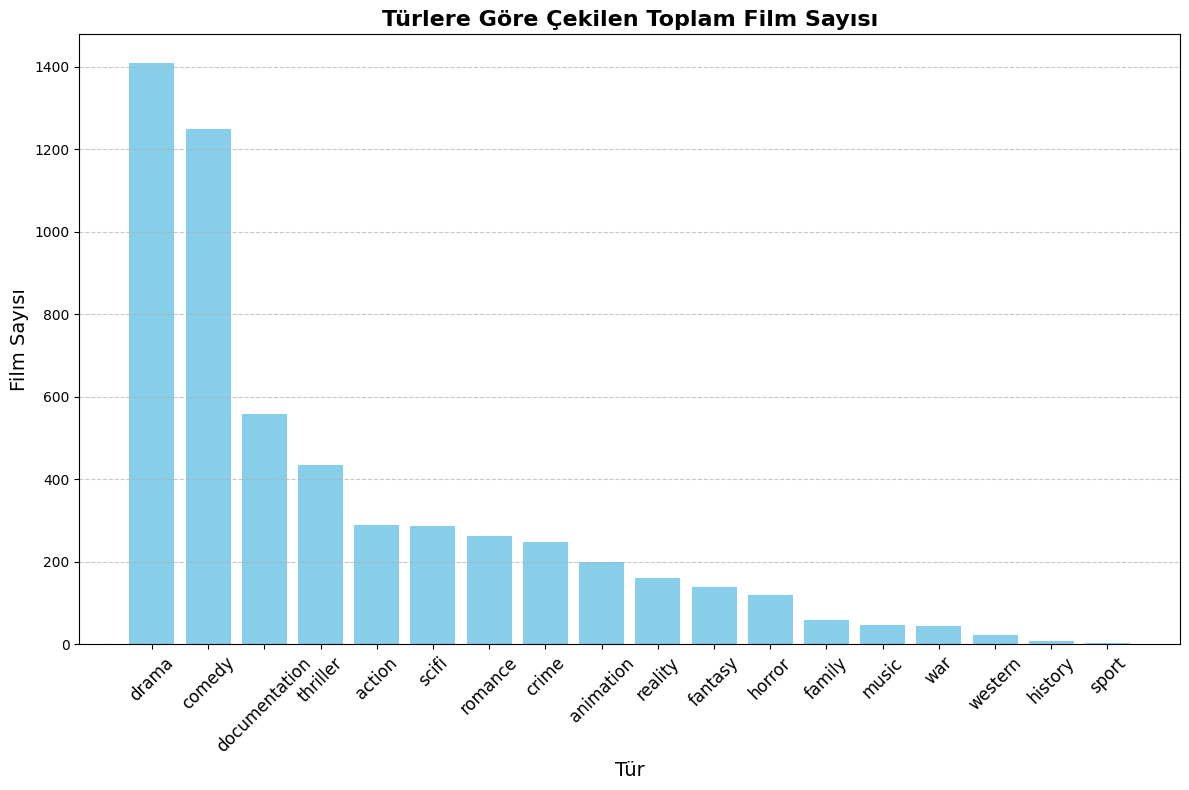

      first_genre  count
5           drama   1408
2          comedy   1248
4   documentation    559
15       thriller    434
0          action    288
13          scifi    286
12        romance    262
3           crime    247
1       animation    199
11        reality    161
7         fantasy    139
9          horror    119
6          family     59
10          music     47
16            war     43
17        western     22
8         history      8
14          sport      4


In [64]:
#pivot tablo
pivot_veri = yil_tur_istatistikleri.pivot(index='release_year', columns='first_genre', values='count').fillna(0)

# Her t√ºrden toplam ka√ß film √ßekildiƒüini hesaplama
tur_toplamlari = yil_tur_istatistikleri.groupby('first_genre')['count'].sum().reset_index()
tur_toplamlari = tur_toplamlari.sort_values(by='count', ascending=False)

# grafik
plt.figure(figsize=(12, 8))
plt.bar(tur_toplamlari['first_genre'], tur_toplamlari['count'], color='skyblue')
plt.title('T√ºrlere G√∂re √áekilen Toplam Film Sayƒ±sƒ±', fontsize=16, fontweight='bold')
plt.xlabel('T√ºr', fontsize=14)
plt.ylabel('Film Sayƒ±sƒ±', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(tur_toplamlari)

Burada hangi t√ºrden ka√ß adet √ßekildiƒüini g√∂r√ºyoruz.
en fazla √ßekilen t√ºr 1408 adet ile drama olurken,
en az √ßekilen t√ºr 4 adet ile sport olmu≈ü.

C:\Users\kurte\AppData\Local\Temp\ipykernel_22216\2846615174.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('donem').apply(lambda x: x.nlargest(n, sutun)).reset_index(drop=True)
C:\Users\kurte\AppData\Local\Temp\ipykernel_22216\2846615174.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('donem').apply(lambda x: x.nlargest(n, sutun)).reset_index(drop=True)


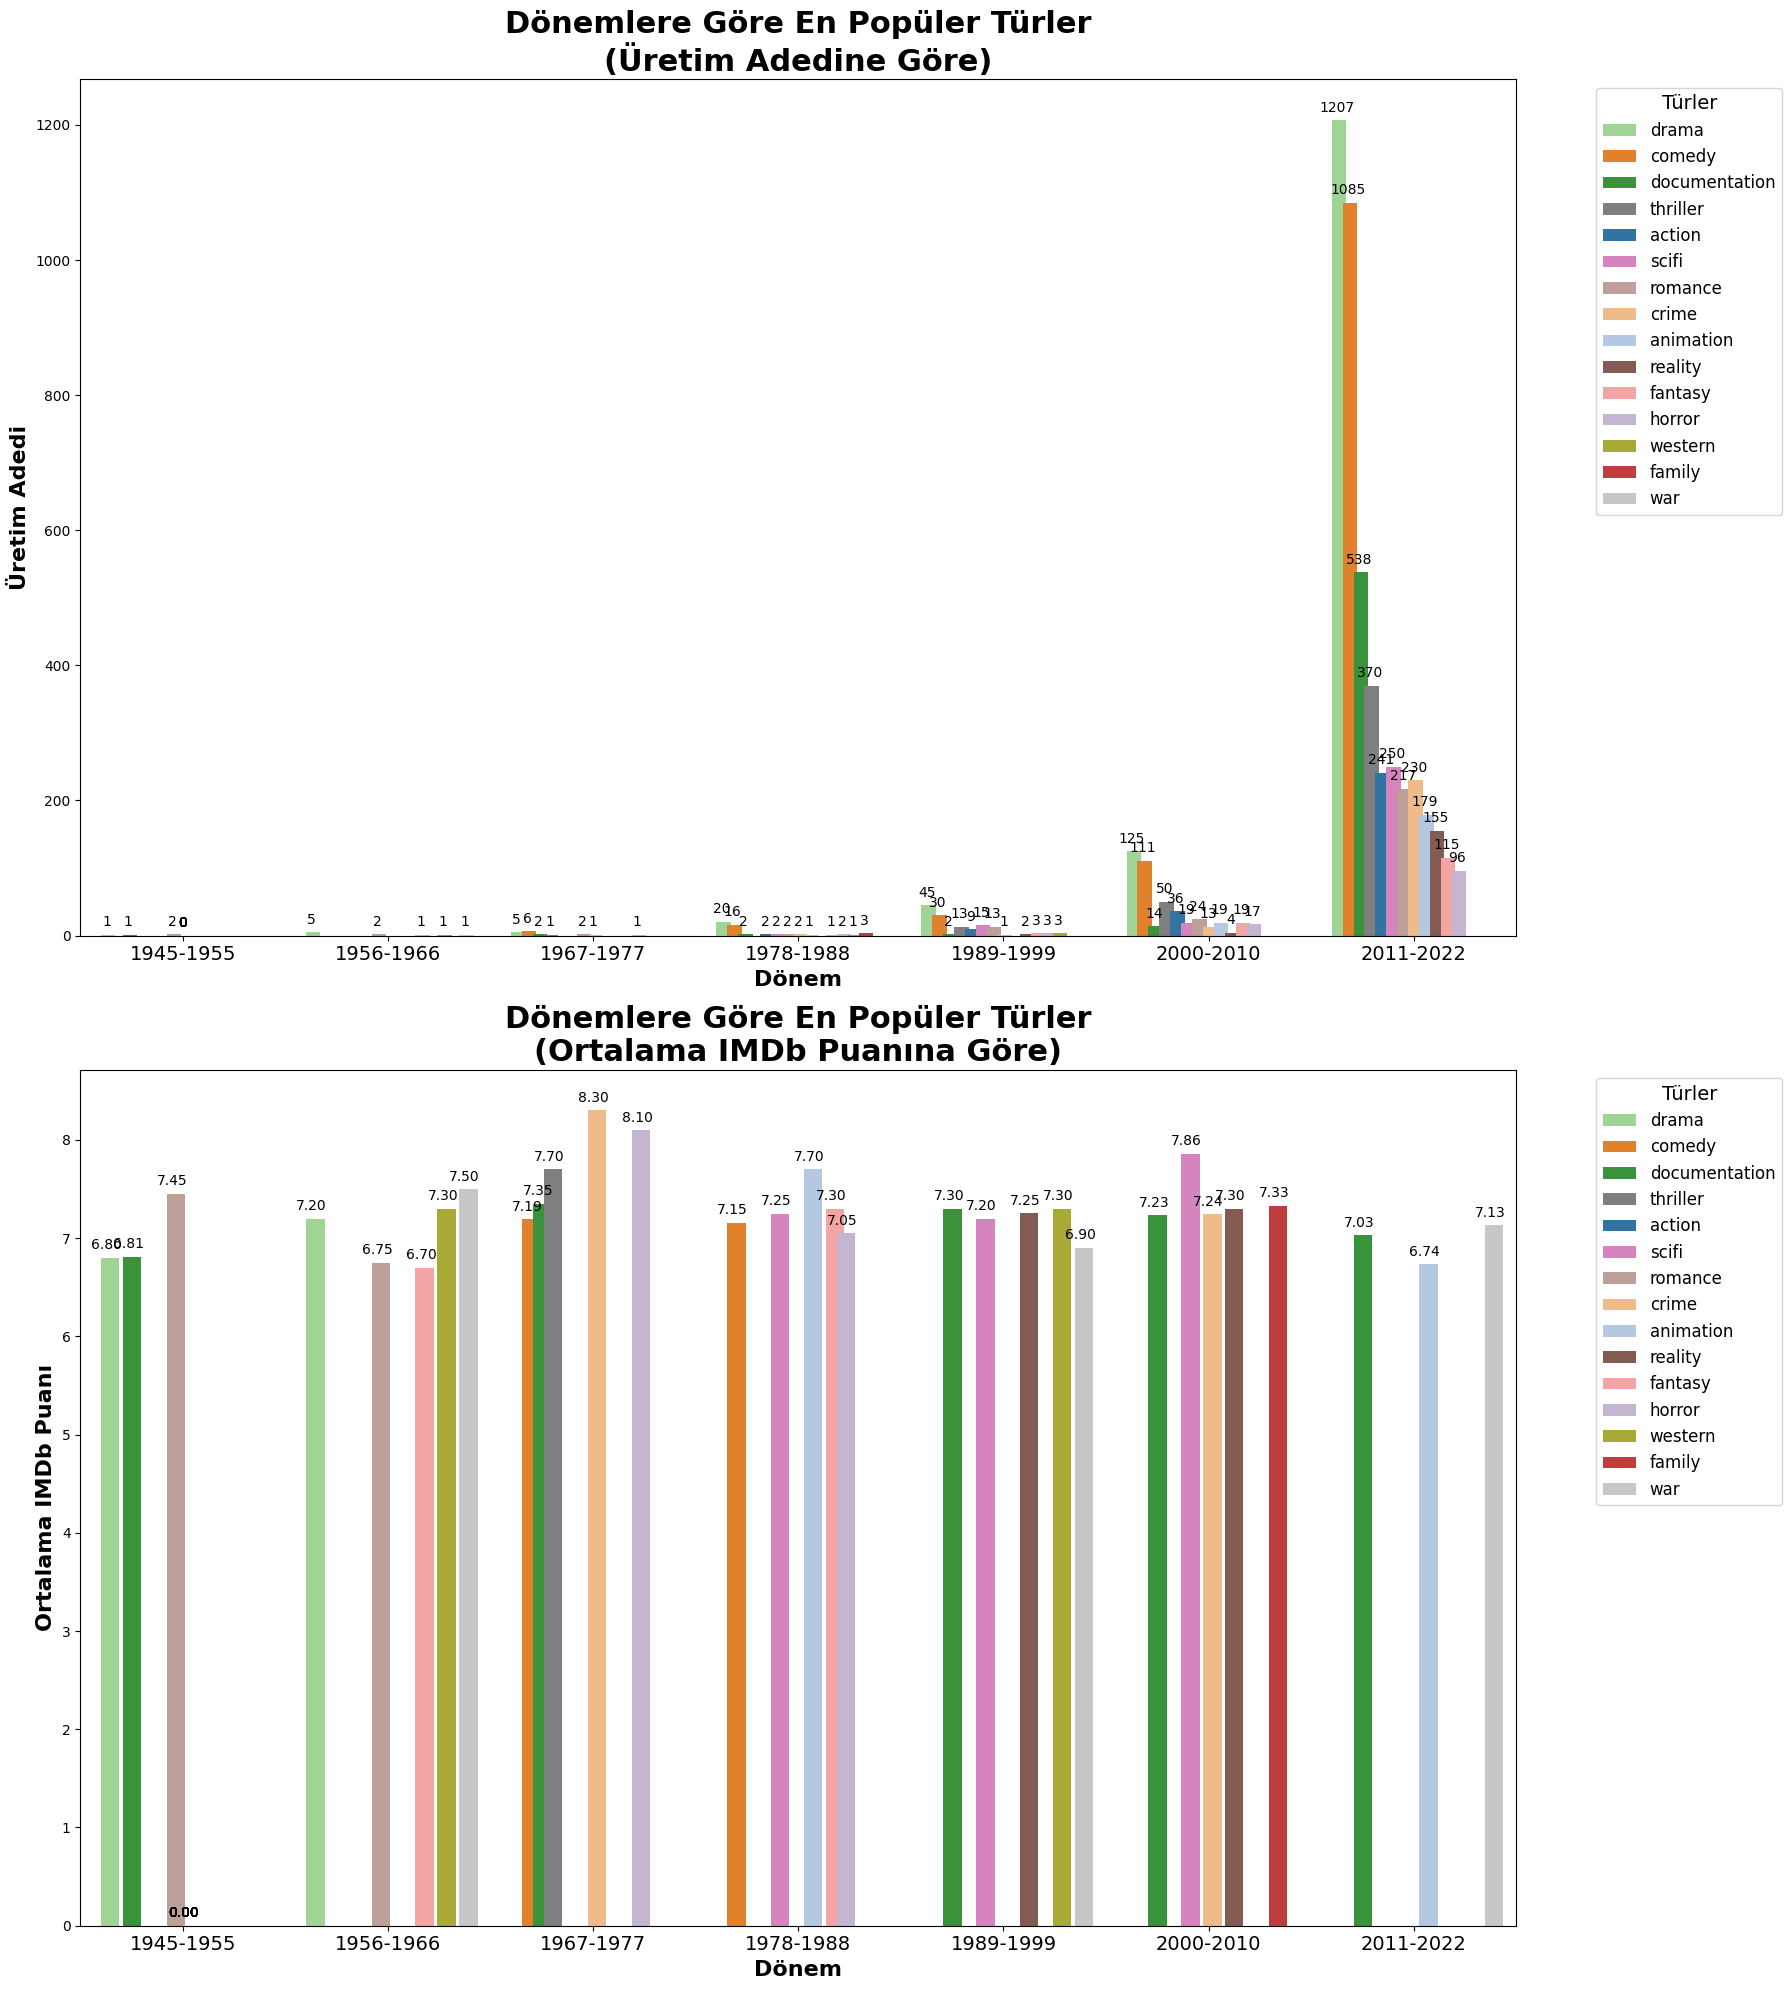

In [65]:
def yil_donemi_belirle(yil):
    donemler = {
        (1945, 1955): '1945-1955',
        (1956, 1966): '1956-1966',
        (1967, 1977): '1967-1977',
        (1978, 1988): '1978-1988',
        (1989, 1999): '1989-1999',
        (2000, 2010): '2000-2010',
        (2011, 2022): '2011-2022'
    }
    for (baslangic, bitis), donem in donemler.items():
        if baslangic <= yil <= bitis:
            return donem
    return 'Diƒüer'

# Veri i≈üleme 
raw['donem'] = raw['release_year'].apply(yil_donemi_belirle)

donem_tur_istatistikleri = raw.groupby(['donem', 'first_genre']).agg(
    film_sayisi=('imdb_score', 'size'),
    ortalama_puan=('imdb_score', 'mean')
).reset_index()

# Pop√ºler t√ºrleri belirleme
def en_populer_n(df, n, sutun):
    return df.groupby('donem').apply(lambda x: x.nlargest(n, sutun)).reset_index(drop=True)

en_populer_turler_adet = en_populer_n(donem_tur_istatistikleri, 12, 'film_sayisi')
en_populer_turler_puan = en_populer_n(donem_tur_istatistikleri, 5, 'ortalama_puan')

# T√ºr listesi ve renk e≈üle≈ütirmesi
tum_turler = sorted(set(en_populer_turler_adet['first_genre']).union(set(en_populer_turler_puan['first_genre'])))
renk_paleti = sns.color_palette("tab20", n_colors=len(tum_turler))
renk_esleme = dict(zip(tum_turler, renk_paleti))

# Kategori sƒ±ralamasƒ± (En √ßoktan en aza)
kategori_siralamasi = en_populer_turler_adet.groupby('first_genre')['film_sayisi'].sum().sort_values(ascending=False).index.tolist()

# Grafik
fig, axes = plt.subplots(2, 1, figsize=(18, 20), facecolor='white')

def grafik_ciz(ax, data, y_sutun, baslik, y_etiket):
    sns.barplot(x='donem', y=y_sutun, hue='first_genre', data=data, palette=renk_esleme, ax=ax, hue_order=kategori_siralamasi)
    ax.set_title(baslik, fontsize=22, fontweight='bold')
    ax.set_xlabel('D√∂nem', fontsize=16, fontweight='bold')
    ax.set_ylabel(y_etiket ,fontsize=16, fontweight='bold')
    ax.tick_params(axis='x', rotation=0, labelsize=14)
    ax.legend(title='T√ºrler', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}' if y_sutun == 'film_sayisi' else f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    return ax
#Grafik
axes[0] = grafik_ciz(axes[0], en_populer_turler_adet, 'film_sayisi', 'D√∂nemlere G√∂re En Pop√ºler T√ºrler\n(√úretim Adedine G√∂re)', '√úretim Adedi')
for bar in axes[0].patches:
    bar.set_width(0.07)

axes[1] = grafik_ciz(axes[1], en_populer_turler_puan, 'ortalama_puan', 'D√∂nemlere G√∂re En Pop√ºler T√ºrler\n(Ortalama IMDb Puanƒ±na G√∂re)', 'Ortalama IMDb Puanƒ±')
for bar in axes[1].patches:
    bar.set_width(0.09)

plt.tight_layout()
plt.show()

D√∂nemlere G√∂re En Pop√ºler T√ºrler (√úretim Adedine G√∂re)

Bu grafik, her d√∂nemde hangi t√ºrde ka√ß film √ºretildiƒüini g√∂stermektedir.
1. Genel Eƒüilim:

   2000'li yƒ±llardan sonra film √ºretiminde b√ºy√ºk bir artƒ±≈ü olduƒüu g√∂r√ºlmektedir. √ñzellikle 2011-2022 d√∂neminde √ºretim adedi ciddi ≈üekilde y√ºkselmi≈ütir.

2. Pop√ºler T√ºrler:

   A. Drama: Hemen hemen her d√∂nemde en √ßok √ºretilen t√ºr dramadƒ±r. √ñzellikle son d√∂nemde (2011-2022) dramanƒ±n √ºretim adedi diƒüer t√ºrlere g√∂re olduk√ßa fazladƒ±r.

   B. Komedi: Komedi de pop√ºler bir t√ºrd√ºr ve √∂zellikle son d√∂nemde dramayla birlikte en √ßok √ºretilen t√ºrler arasƒ±ndadƒ±r.

   C. Belgesel (Documentation):Belgesel t√ºr√ºn√ºn de son d√∂nemde belirgin bir artƒ±≈ü g√∂sterdiƒüi g√∂r√ºlmektedir.

3. Diƒüer T√ºrler:

   Aksiyon, bilim kurgu, romantik, su√ß, animasyon gibi t√ºrler de belirli d√∂nemlerde √∂ne √ßƒ±kmƒ±≈ü olsa da, drama ve komedi kadar istikrarlƒ± bir pop√ºlerliƒüe sahip deƒüillerdir.


D√∂nemlere G√∂re En Pop√ºler T√ºrler (Ortalama IMDb Puanƒ±na G√∂re)

Bu grafik, her d√∂nemde farklƒ± t√ºrdeki filmlerin ortalama IMDb puanlarƒ±nƒ± g√∂stermektedir.
1. Genel Eƒüilim:

   Ortalama puanlar genellikle 6.5 ile 8.5 arasƒ±nda deƒüi≈ümektedir. √áok b√ºy√ºk bir deƒüi≈üiklik g√∂zlenmemektedir.

2. Y√ºksek Puanlƒ± T√ºrler:
   
   A. Drama: Dramanƒ±n hem √ßok √ºretilen bir t√ºr olmasƒ± hem de ortalama puanƒ±nƒ±n genellikle y√ºksek olmasƒ± dikkat √ßekicidir.

   B. Belgesel (Documentation): √ñzellikle 1967-1977 ve 2000-2010 d√∂nemlerinde belgesellerin ortalama puanlarƒ±nƒ±n diƒüer t√ºrlere g√∂re daha y√ºksek 
   olduƒüu g√∂r√ºlmektedir.

   C. Sava≈ü (War): Sava≈ü filmlerinin de bazƒ± d√∂nemlerde y√ºksek ortalama puanlara sahip olduƒüu g√∂r√ºlmektedir.

   D. D√º≈ü√ºk Puanlƒ± T√ºrler: Reality t√ºr√ºn√ºn ortalama puanƒ± genellikle diƒüer t√ºrlere g√∂re daha d√º≈ü√ºkt√ºr.

ƒ∞ki Grafiƒüin Birlikte Yorumlanmasƒ±:

1. Pop√ºlerlik ve Kalite: 

   Bir t√ºr√ºn √ßok √ºretilmesi, otomatik olarak o t√ºr√ºn y√ºksek puan alacaƒüƒ± anlamƒ±na gelmez. √ñrneƒüin, drama √ßok √ºretilen bir t√ºr olmasƒ±na raƒümen, ortalama puanƒ± her d√∂nemde en y√ºksek olan t√ºr deƒüildir.

2. D√∂nemsel Deƒüi≈üimler:

   T√ºrlerin pop√ºlerliƒüi ve ortalama puanlarƒ± d√∂nemlere g√∂re deƒüi≈üiklik g√∂sterebilir. √ñrneƒüin, belgesel t√ºr√º bazƒ± d√∂nemlerde hem √ºretim adedi hem de ortalama puan a√ßƒ±sƒ±ndan √∂ne √ßƒ±karken, bazƒ± d√∂nemlerde daha az pop√ºler olabilir.

3. Belgesel ve Sava≈ü T√ºrlerinin Farklƒ±lƒ±ƒüƒ±:

   Belgesel ve sava≈ü t√ºrlerinin genellikle daha y√ºksek ortalama puanlara sahip olmasƒ±, bu t√ºrlerin genellikle daha ciddi konularƒ± ele almasƒ± ve daha derinlemesine bir anlatƒ±ma sahip olmasƒ±yla ili≈ükilendirilebilir.

YILLARA G√ñRE T√úR SAYISININ √áƒ∞ZGƒ∞ GRAFƒ∞K ƒ∞LE G√ñSTERƒ∞Mƒ∞

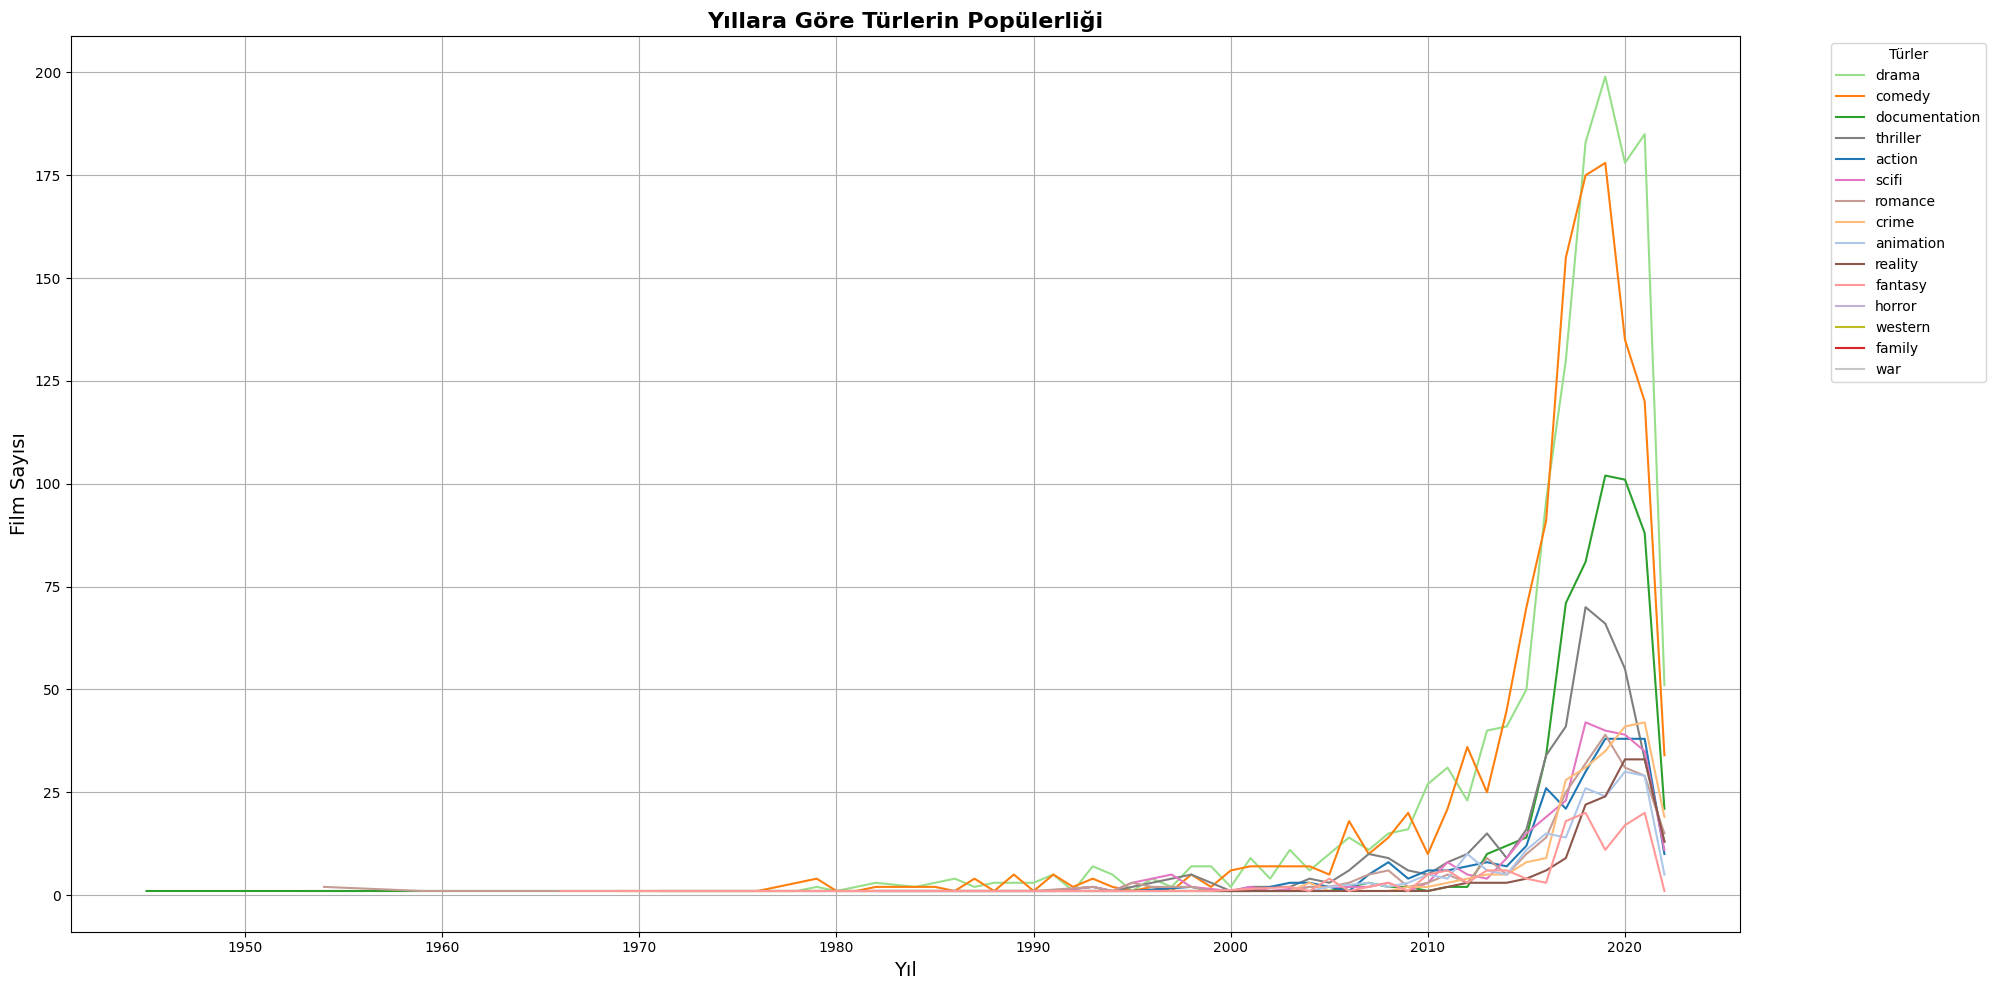

In [66]:
# Az i√ßerik √ºretilen t√ºrleri belirlemek i√ßin toplam film sayƒ±sƒ±nƒ± hesaplama
toplam_sayi = yil_tur_istatistikleri.groupby('first_genre')['count'].sum()

# E≈üik belirleme. bu e≈üikten a≈üaƒüƒ±sƒ±nƒ± Other olarak sƒ±nƒ±flandƒ±racak
threshold = 120
yil_tur_istatistikleri['adjusted_genre'] = yil_tur_istatistikleri['first_genre'].apply(
    lambda x: x if toplam_sayi[x] >= threshold else 'Other'
)

# T√ºr ve yƒ±l bazƒ±nda yeniden gruplama
yenilenmis_data = yil_tur_istatistikleri.groupby(['release_year', 'adjusted_genre']).agg(
    count=('count', 'sum')
).reset_index()

# √áizgi grafiƒüi
plt.figure(figsize=(20, 10))
sns.lineplot(x='release_year', y='count', hue='adjusted_genre', data=yenilenmis_data, palette=renk_esleme, hue_order=kategori_siralamasi)

# Grafik
plt.title('Yƒ±llara G√∂re T√ºrlerin Pop√ºlerliƒüi', fontsize=16, fontweight='bold')
plt.xlabel('Yƒ±l', fontsize=14)
plt.ylabel('Film Sayƒ±sƒ±', fontsize=14)
plt.legend(title='T√ºrler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=0)

# Grafik g√∂sterme
plt.tight_layout()
plt.show()


1. Genel G√∂zlemler:

   A. √úretim Artƒ±≈üƒ±: 
      2000'li yƒ±llardan itibaren film √ºretiminde belirgin bir artƒ±≈ü g√∂zleniyor. √ñzellikle 2010'dan sonra bu artƒ±≈ü daha da hƒ±zlanmƒ±≈ü. Bu, film end√ºstrisindeki genel b√ºy√ºme ve teknolojik geli≈ümelerle a√ßƒ±klanabilir.
   B. T√ºrlerin Deƒüi≈üen Pop√ºlerliƒüi: 
      T√ºrlerin pop√ºlerliƒüi yƒ±llar i√ßinde deƒüi≈üiklik g√∂stermi≈ü. Bazƒ± t√ºrler belirli d√∂nemlerde daha pop√ºlerken, bazƒ±larƒ± zamanla pop√ºlerliƒüini yitirmi≈ü veya yeniden kazanmƒ±≈ü.

2. √ñne √áƒ±kan T√ºrler ve Eƒüilimler:

   A. Drama:
      Grafikte en belirgin ve istikrarlƒ± t√ºrlerden biri drama. Neredeyse her d√∂nemde varlƒ±ƒüƒ±nƒ± korumu≈ü ve 2010'dan sonraki √ºretim artƒ±≈üƒ±ndan en √ßok etkilenen t√ºrlerden biri olmu≈ü. Bu, dramanƒ±n her zaman izleyiciler tarafƒ±ndan ilgi g√∂rd√ºƒü√ºn√º ve film yapƒ±mcƒ±larƒ± tarafƒ±ndan tercih edildiƒüini g√∂steriyor.

   B. Komedi:
      Komedi de dramaya benzer ≈üekilde istikrarlƒ± bir pop√ºlerliƒüe sahip. √ñzellikle 2010'dan sonraki artƒ±≈üta dramayla birlikte √∂ne √ßƒ±kan t√ºrlerden.

   C. Belgesel (Documentation):
      Belgesel t√ºr√º, grafikte daha ge√ß d√∂nemlerde belirginle≈ümeye ba≈ülamƒ±≈ü. 2010'dan sonraki artƒ±≈ütan etkilenen t√ºrlerden biri ve son yƒ±llarda pop√ºlerliƒüinin arttƒ±ƒüƒ± g√∂r√ºl√ºyor. Bu, belgesel yapƒ±m tekniklerindeki geli≈ümeler ve artan toplumsal farkƒ±ndalƒ±kla ili≈ükilendirilebilir.

   D. Aksiyon (Action), Gerilim (Thriller), Bilim Kurgu (Sci-Fi):
      Bu t√ºrler de grafikte belirli d√∂nemlerde √∂ne √ßƒ±kmƒ±≈ü. Aksiyon ve gerilim, √∂zellikle 2000'li yƒ±llardan sonraki artƒ±≈üta √∂nemli bir paya sahip. Bilim kurgu ise daha dalgalƒ± bir seyir izlemi≈ü, bazƒ± d√∂nemlerde daha pop√ºlerken bazƒ± d√∂nemlerde daha az ilgi g√∂rm√º≈ü.
      
   E. Diƒüer T√ºrler:
      Romantik (Romance), Su√ß (Crime), Animasyon (Animation), Reality, Fantazi (Fantasy), Korku (Horror), Western, Aile (Family) gibi t√ºrler grafikte daha az belirgin. Bu, bu t√ºrlerin ya daha ni≈ü bir kitleye hitap ettiƒüini ya da pop√ºlerliklerinin zaman i√ßinde daha fazla dalgalandƒ±ƒüƒ±nƒ± g√∂steriyor.
   
Yƒ±llara G√∂re Deƒüi≈üim:
   1900-1970: Bu d√∂nemde film √ºretimi olduk√ßa sƒ±nƒ±rlƒ±. T√ºr √ße≈üitliliƒüi de az.
   1970-2000: √úretimde yava≈ü bir artƒ±≈ü ba≈ülƒ±yor. T√ºr √ße≈üitliliƒüi de artƒ±yor.
   2000-2010: Film √ºretiminde belirgin bir ivme kazanƒ±lƒ±yor. √ñzellikle aksiyon ve gerilim t√ºrleri √∂ne √ßƒ±kƒ±yor.
   2010-2020: Film √ºretiminde patlama ya≈üanƒ±yor. Drama, komedi ve belgesel gibi t√ºrler en √ßok √ºretilenler arasƒ±nda. T√ºr √ße≈üitliliƒüi de en y√ºksek seviyede.

                                          üìπüìπB√ñLGESEL ƒ∞√áERƒ∞K TERCƒ∞HLERƒ∞üìπüìπ

In [67]:
# ƒ∞lk √ºlke ve t√ºr√º almak
raw['first_countries'] = raw['production_countries'].apply(lambda x: ast.literal_eval(x)[0] if x != '[]' else 'Unknown')
raw['first_genre'] = raw['first_genre']


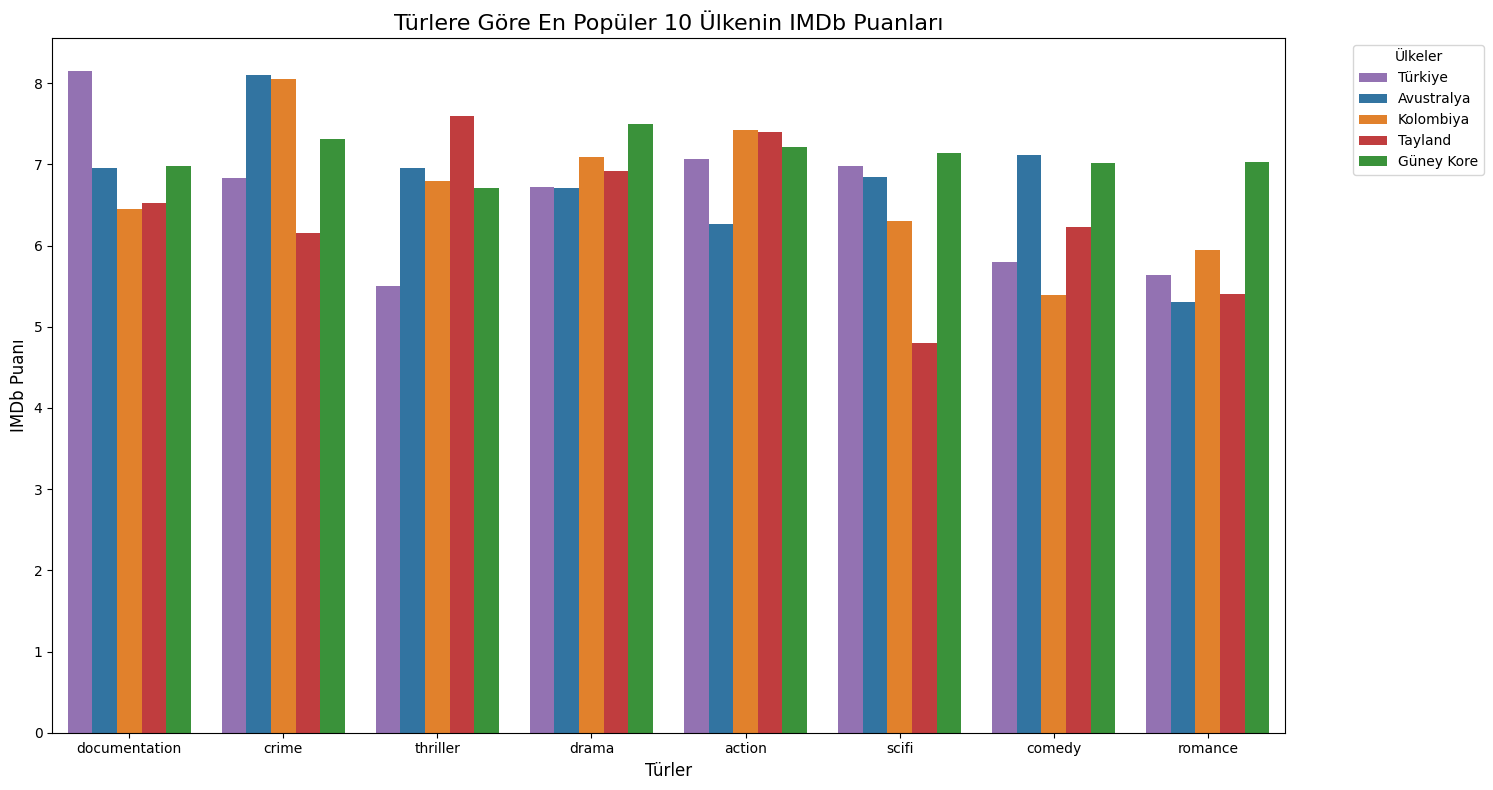

In [68]:

# secilen t√ºrler
istenecek_turler = ['drama', 'action', 'comedy', 'documentation', 'thriller', 'scifi', 'romance', 'crime']

# first_countries, first_genre ve imdb_score s√ºtunlarƒ± ile gruplama
popularity_df = raw[raw['first_genre'].isin(istenecek_turler)] \
    .groupby(['first_countries', 'first_genre']).agg({
        'imdb_score': 'mean',  # IMDb puanƒ±nƒ±n ortalamasƒ±nƒ± alƒ±yor
    }).reset_index()

# En y√ºksek imdb puanƒ±na sahip t√ºr ve √ºlke kombinasyonlarƒ±nƒ± se√ßme
popularity_df_sorted = popularity_df.sort_values(by='imdb_score', ascending=False)

# En pop√ºler 10 √º lke
top_countries = popularity_df_sorted['first_countries'].value_counts().head(5).index
popularity_df = popularity_df_sorted[popularity_df_sorted['first_countries'].isin(top_countries)]

#renk paleti
tum_ulkeler = sorted(set(popularity_df['first_countries']))
renk_paleti = sns.color_palette("tab10", n_colors=len(tum_ulkeler))
ulke_renk_esleme = dict(zip(tum_ulkeler, renk_paleti))

ulke_isimleri = {
    'TR': 'T√ºrkiye',
    'AU': 'Avustralya',
    'CO': 'Kolombiya',
    'TH': 'Tayland',
    'KR': 'G√ºney Kore',
}

# Bar grafik
plt.figure(figsize=(15, 8))
sns.barplot(data=popularity_df, x='first_genre', y='imdb_score', hue='first_countries', palette=ulke_renk_esleme)
plt.title('T√ºrlere G√∂re En Pop√ºler 10 √úlkenin IMDb Puanlarƒ±', fontsize=16)
plt.xlabel('T√ºrler', fontsize=12)
plt.ylabel('IMDb Puanƒ±', fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [ulke_isimleri.get(label, label) for label in labels] 
plt.legend(handles,new_labels,title='√úlkeler', bbox_to_anchor=(1.05, 1), loc='upper left')

# grafik g√∂sterme
plt.tight_layout()
plt.show()


Grafik, se√ßilen 8 t√ºr i√ßin en pop√ºler 5 √ºlkenin ortalama IMDb puanlarƒ±nƒ± g√∂stermektedir. 

1. Grafikten √ßƒ±karƒ±labilecek bazƒ± sonu√ßlar ≈üunlardƒ±r:

   A. T√ºrlere G√∂re Puan Deƒüi≈üimi:

      IMDb puanlarƒ± t√ºrlere g√∂re deƒüi≈üiklik g√∂stermektedir. √ñrneƒüin, belgesel t√ºr√º genellikle daha y√ºksek puanlara sahipken, romantik ve komedi t√ºrleri daha d√º≈ü√ºk puanlara sahip olabilir.

   B. √úlkeler Arasƒ± Kar≈üƒ±la≈ütƒ±rma:

      Farklƒ± √ºlkelerin aynƒ± t√ºrdeki filmleri i√ßin ortalama IMDb puanlarƒ± farklƒ±lƒ±k g√∂sterebilir. Bu, √ºlkelerin film yapƒ±m tarzlarƒ±ndaki, k√ºlt√ºrel farklƒ±lƒ±klardaki veya hedef kitlelerindeki farklƒ±lƒ±klardan kaynaklanabilir.
      
   C. En Y√ºksek ve En D√º≈ü√ºk Puanlar:
   
      Grafikten hangi t√ºrlerin ve hangi √ºlkelerin en y√ºksek ve en d√º≈ü√ºk ortalama IMDb puanlarƒ±na sahip olduƒüu g√∂r√ºlebilir. √ñrneƒüin, belirli bir √ºlke belirli bir t√ºrde diƒüerlerine g√∂re belirgin ≈üekilde daha y√ºksek puanlara sahip olabilir.

2. √ñnemli Noktalar:

   Grafik ortalama IMDb puanlarƒ±nƒ± g√∂stermektedir. Tek tek filmlerin puanlarƒ± bu ortalamalarƒ±n etrafƒ±nda deƒüi≈üiklik g√∂sterebilir.
   "En pop√ºler 5 √ºlke" ifadesi, en √ßok film √ºreten veya en √ßok veri bulunan 5 √ºlkeyi ifade eder. Bu, bu √ºlkelerin filmlerinin daha √ßok g√∂r√ºn√ºr olduƒüu veya daha √ßok oylandƒ±ƒüƒ± anlamƒ±na gelebilir.
   Grafik sadece se√ßilen 8 t√ºr√º ve 5 √ºlkeyi g√∂stermektedir. Diƒüer t√ºrler ve √ºlkeler dahil edilseydi, sonu√ßlar farklƒ± olabilirdi.
   
   √ñzetle, bu grafik, se√ßilen t√ºrler i√ßin en pop√ºler 5 √ºlkenin ortalama IMDb puanlarƒ±nƒ± kar≈üƒ±la≈ütƒ±rmaktadƒ±r.

Yorum:
   √ñrneƒüin, grafikte T√ºrkiye'nin belgesel t√ºr√ºndeki ortalama IMDb puanƒ±nƒ±n diƒüer √ºlkelere g√∂re daha y√ºksek olduƒüu g√∂r√ºlmektedir. Bu, T√ºrkiye'de √ßekilen belgesel filmlerinin genel olarak daha y√ºksek puanlar aldƒ±ƒüƒ±nƒ± g√∂sterebilir. Buna kar≈üƒ±lƒ±k, Tayland'ƒ±n aksiyon t√ºr√ºndeki ortalama puanƒ± diƒüer √ºlkelere g√∂re daha d√º≈ü√ºk olabilir.

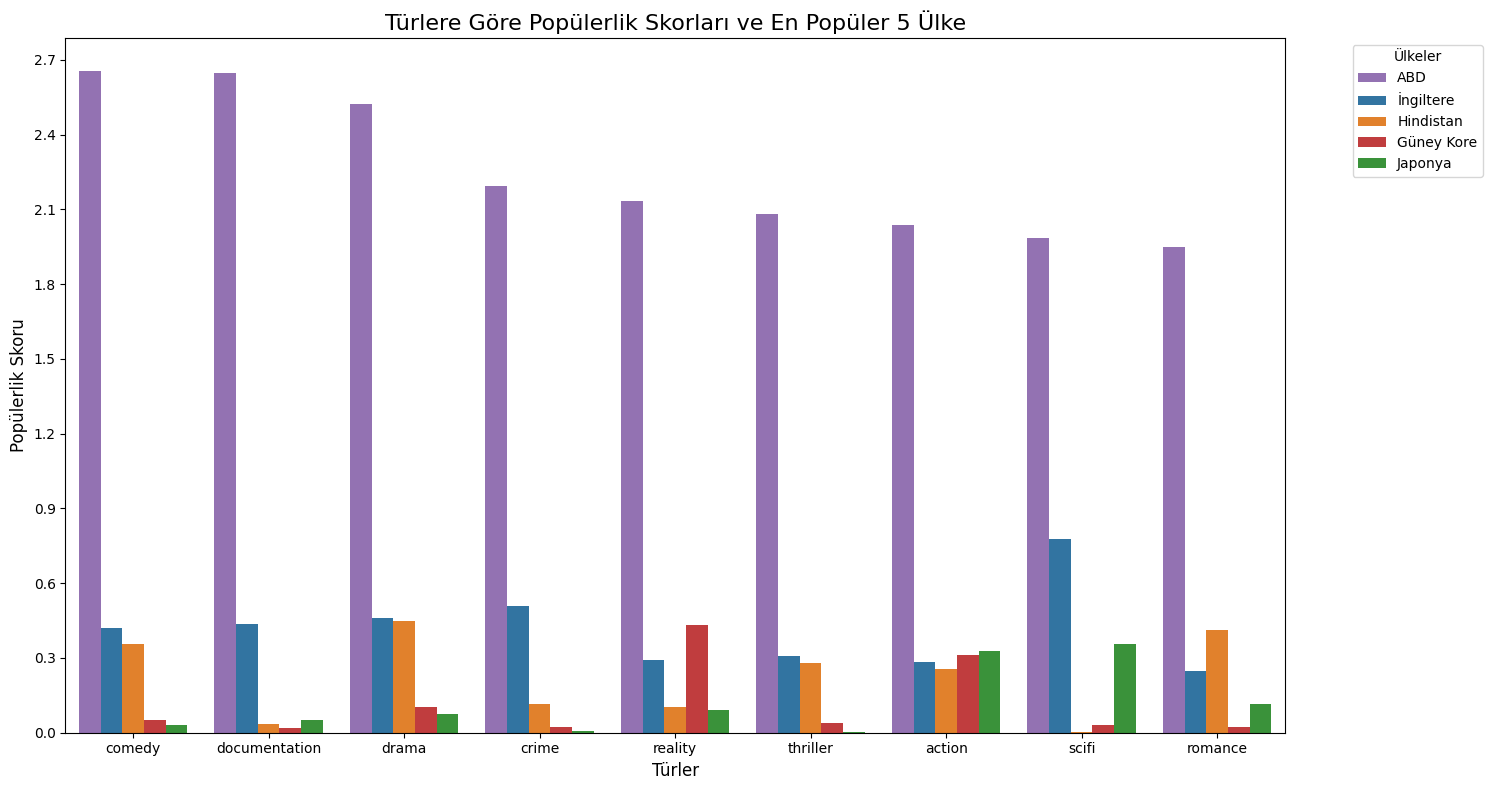

In [69]:
# Se√ßilen t√ºrler
istenecek_turler = ['drama', 'action', 'comedy', 'documentation', 'thriller', 'scifi', 'romance', 'crime','reality']

# Gruplama ve toplama
popularity_df = raw[raw['first_genre'].isin(istenecek_turler)] \
    .groupby(['first_countries', 'first_genre']).agg({
        'imdb_score': 'mean',   # IMDb puanƒ±nƒ±n ortalamasƒ±
        'imdb_votes': 'sum',    # Oy sayƒ±larƒ±nƒ±n toplamƒ±
        'title': 'count'        # Film sayƒ±sƒ±n
    }).reset_index()

popularity_df = popularity_df.rename(columns={'title': 'film_count'})

# T√ºr bazƒ±nda toplam oy sayƒ±larƒ±nƒ± hesaplama
genre_total_votes = popularity_df.groupby('first_genre')['imdb_votes'].sum().reset_index()
popularity_df = pd.merge(popularity_df, genre_total_votes, on='first_genre', suffixes=('', '_total'))

# T√ºr bazƒ±nda aƒüƒ±rlƒ±klƒ± IMDb puanƒ± hesaplama
popularity_df['weighted_imdb_score_by_genre'] = (popularity_df['imdb_score'] * popularity_df['imdb_votes']) / popularity_df['imdb_votes_total']

# Film sayƒ±sƒ±nƒ± 0-1 arasƒ±na √∂l√ßeklendirme (normalizasyon)
popularity_df['normalized_film_count'] = (popularity_df['film_count'] - popularity_df['film_count'].min()) / (popularity_df['film_count'].max() - popularity_df['film_count'].min())

# Pop√ºlerlik skoru. Aƒüƒ±rlƒ±klƒ± IMDb puanƒ± ve normalize edilmi≈ü film sayƒ±sƒ±nƒ±n ortalamasƒ±
popularity_df['popularity_score'] = (popularity_df['weighted_imdb_score_by_genre'] + popularity_df['normalized_film_count']) / 2

# En y√ºksek pop√ºlerlik skoruna sahip t√ºr ve √ºlkeleri se√∂me 
popularity_df_sorted = popularity_df.sort_values(by='popularity_score', ascending=False)

# En pop√ºler 5 √ºlkr
top_countries = popularity_df_sorted['first_countries'].value_counts().head(5).index
popularity_df = popularity_df_sorted[popularity_df_sorted['first_countries'].isin(top_countries)]

# T√ºm √ºlkeler ve renk paleti e≈ülme
tum_ulkeler = sorted(popularity_df['first_countries'].unique())
renk_paleti = sns.color_palette("tab10", n_colors=len(tum_ulkeler))
ulke_renk_esleme = dict(zip(tum_ulkeler, renk_paleti))

# kƒ±saltmalarƒ± a√ßan s√∂zl√ºk
ulke_isimleri = {
    'US': 'ABD',
    'IN': 'Hindistan',
    'KR': 'G√ºney Kore',
    'JP': 'Japonya',
    'GB': 'ƒ∞ngiltere',
}

# Grafik olu≈üturma
plt.figure(figsize=(15, 8))
sns.barplot(data=popularity_df, x='first_genre', y='popularity_score', hue='first_countries', palette=ulke_renk_esleme)
# Y eksenini ayarlama
from matplotlib.ticker import MultipleLocator
plt.gca().yaxis.set_major_locator(MultipleLocator(0.3))

plt.title('T√ºrlere G√∂re Pop√ºlerlik Skorlarƒ± ve En Pop√ºler 5 √úlke', fontsize=16)
plt.xlabel('T√ºrler', fontsize=12)
plt.ylabel('Pop√ºlerlik Skoru', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [ulke_isimleri.get(label, label) for label in labels]  # Kƒ±saltmalarƒ± tam isimlerle deƒüi≈ütir
plt.legend(handles, new_labels, title='√úlkeler', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grafik g√∂sterme
plt.tight_layout()
plt.show()


***Pop√ºlerlik Skoru = [((Film IMDb Puanƒ± * Film Oy Sayƒ±sƒ±) / T√ºrdeki Toplam Oy Sayƒ±sƒ±) + ((Film Sayƒ±sƒ± - En D√º≈ü√ºk Film Sayƒ±sƒ±) / (En Y√ºksek Film Sayƒ±sƒ± - En D√º≈ü√ºk Film Sayƒ±sƒ±))] / 2***
Grafikteki her bir √ßubuk, belirli bir t√ºr ve √ºlke i√ßin hesaplanan pop√ºlerlik skorunu temsil eder. Bu skor, yukarƒ±da a√ßƒ±klanan form√ºle g√∂re hesaplanmƒ±≈ütƒ±r. Bu nedenle, grafiƒüi yorumlarken hem aƒüƒ±rlƒ±klƒ± IMDb puanƒ±nƒ± hem de normalize edilmi≈ü film sayƒ±sƒ±nƒ± g√∂z √∂n√ºnde bulundurmalƒ±yƒ±z.

1. Grafikten √áƒ±karƒ±labilecek Sonu√ßlar:

   A. ABD'nin Y√ºksek Skorlarƒ±: 

      ABD'nin neredeyse t√ºm t√ºrlerde en y√ºksek skorlara sahip olmasƒ±, hem bu t√ºrlerdeki ABD yapƒ±mƒ± filmlerin genellikle y√ºksek IMDb puanlarƒ±na sahip olmasƒ±ndan hem de bu t√ºrlerde √ßok sayƒ±da film √ºretmesinden kaynaklanmaktadƒ±r. Yani, ABD hem "kalite" (IMDb puanƒ±) hem de "miktar" (film sayƒ±sƒ±) a√ßƒ±sƒ±ndan y√ºksek performansa sahiptir.

   B. Komedi ve Belgesel T√ºrlerinin Y√ºksek Pop√ºlerliƒüi (ABD'de):

      √ñzellikle ABD'de komedi ve belgesel t√ºrlerinin y√ºksek skorlara sahip olmasƒ±, bu t√ºrlerdeki filmlerin y√ºksek IMDb puanlarƒ±nƒ±n yanƒ± sƒ±ra bu t√ºrlerde √ßok sayƒ±da film √ºretilmesinden de kaynaklanmaktadƒ±r. Bu t√ºrler hem izleyiciler tarafƒ±ndan beƒüenilmekte (y√ºksek puanlar) hem de yapƒ±mcƒ±lar tarafƒ±ndan tercih edilmektedir (√ßok sayƒ±da film).

   C. Diƒüer √úlkelerin T√ºrlere G√∂re Farklƒ±la≈üan Performansƒ±:

      Diƒüer √ºlkelerin (ƒ∞ngiltere, Hindistan, G√ºney Kore, Japonya) belirli t√ºrlerde daha y√ºksek skorlara sahip olmasƒ±, o t√ºrlerdeki filmlerinin y√ºksek IMDb puanlarƒ±na ve/veya o √ºlkede o t√ºrden daha fazla film √ºretilmesine baƒülƒ±dƒ±r. √ñrneƒüin, Hindistan'ƒ±n drama t√ºr√ºnde daha y√ºksek bir skora sahip olmasƒ±, bu √ºlkede drama t√ºr√ºnde hem kaliteli filmlerin √ºretildiƒüini hem de bu t√ºrde daha fazla film √ºretildiƒüini g√∂sterebilir.

   D. Reality ve Bilim Kurgu T√ºrlerinin G√∂rece D√º≈ü√ºk Pop√ºlerliƒüi (Bazƒ± √úlkelerde):
   
      Bazƒ± √ºlkelerde reality ve bilim kurgu t√ºrlerinin d√º≈ü√ºk skorlara sahip olmasƒ±, bu t√ºrlerdeki filmlerin daha d√º≈ü√ºk IMDb puanlarƒ±na ve/veya o √ºlkelerde bu t√ºrde daha az film √ºretilmesine baƒülƒ± olabilir.

Yorum:
   √ñrneƒüin, grafikte ABD'nin komedi t√ºr√ºndeki skoru √ßok y√ºksek. Bu, ABD'de √ßekilen komedi filmlerinin hem ortalama olarak y√ºksek IMDb puanlarƒ±na sahip olduƒüunu hem de bu t√ºrde √ßok sayƒ±da film √ºretildiƒüini g√∂sterir. Buna kar≈üƒ±lƒ±k, Japonya'nƒ±n komedi t√ºr√ºndeki skoru daha d√º≈ü√ºk. Bu, Japonya'da √ßekilen komedi filmlerinin ya ortalama olarak daha d√º≈ü√ºk IMDb puanlarƒ±na sahip olduƒüunu ya da bu t√ºrde daha az film √ºretildiƒüini g√∂sterir.